In [1]:
import os
import pandas as pd
import ROOT
from array import array
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from tableauColors import palette

Welcome to JupyROOT 6.18/00


In [2]:
DATA_DIR = '/groups/hep/mojen/repositories/DREAM/Analysis'
# DATA_DIR = '/groups/hep/mojen/repositories/DREAM/Run/final_run/tauolaevts/25000'
# DATA_DIR = '/home/jupyter/DREAM'

fileName = os.path.join(DATA_DIR, 'dfmerged2.csv')
df = pd.read_csv(fileName)
print(df.shape)
df.head()

(12243, 18)


,eventId,clusterId,PrimaryDecayMode,VecShowerEnergy,S_sum,C_sum,S_rad_mean,C_rad_mean,S_hot,C_hot,CoverS,rec_energy,label,comi,comj,label_binary,predictedLabel,predictedEnergy
0,1,1,4,13397.354239,7151.5063,4673.8125,4.663652,3.531102,0.070806,0.058091,0.653542,7799.056950,3,124.297177,127.529336,1.0,3.0,15726.400613
1,1,2,4,10115.048809,11443.4320,8736.7320,2.372905,1.656477,0.260583,0.188679,0.763471,12150.833917,2,135.302284,180.102213,NaN,2.0,11734.665162
2,1,3,4,4740.947309,5503.8794,4518.6650,2.474627,2.093691,0.116771,0.190987,0.820996,5761.367321,2,150.901653,175.728180,NaN,2.0,5753.730248
3,1,4,4,11594.263998,11814.1950,12111.1870,2.684480,1.768877,0.178017,0.168935,1.025139,11736.575496,2,138.098989,156.801442,NaN,2.0,12692.102576
4,1,5,4,2466.543425,2015.4009,1958.7346,2.239408,1.640035,0.152792,0.247525,0.971883,2030.210760,2,157.373331,147.430008,NaN,2.0,2514.676255


In [3]:
df_electron = df.loc[df.label == 0]
df_muon = df.loc[df.label == 1]
df_gamma = df.loc[df.label == 2]
df_pion = df.loc[df.label == 3]

In [4]:
def mape(y_true, y_pred):
    y_true = y_true.reshape([-1,1])
    y_pred = y_pred.reshape([-1,1])
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
print(mape(df_electron.VecShowerEnergy.values, df_electron.rec_energy.values), mape(df_electron.VecShowerEnergy.values, df_electron.predictedEnergy.values))
print(mape(df_muon.VecShowerEnergy.values, df_muon.rec_energy.values), mape(df_muon.VecShowerEnergy.values, df_muon.predictedEnergy.values))
print(mape(df_gamma.VecShowerEnergy.values, df_gamma.rec_energy.values), mape(df_gamma.VecShowerEnergy.values, df_gamma.predictedEnergy.values))
print(mape(df_pion.VecShowerEnergy.values, df_pion.rec_energy.values), mape(df_pion.VecShowerEnergy.values, df_pion.predictedEnergy.values))

11.960919899745871 6.99380883024512
85.60763802274018 49.660623898357144
26.278801826115604 34.88610554887988
51.18232214966958 31.735469353156358


In [6]:
f = ROOT.TFile('dfmerged2.root', 'recreate' )
t = ROOT.TTree('dfmerged2', 'tree with dfmerged set' )

PrimaryDecayMode = array('i', [0])
VecShowerEnergy = array('d', [0.])
S_sum = array('d', [0.])
C_sum = array('d', [0.])
S_rad_mean = array('d', [0.])
C_rad_mean = array('d', [0.])
S_hot = array('d', [0.])
C_hot = array('d', [0.])
CoverS = array('d', [0.])
# dist2charge = array('d', [0.])
rec_energy = array('d', [0.])
predictedEnergy = array('d', [0.])
label = array('i', [0])

t.Branch('PrimaryDecayMode', PrimaryDecayMode, "PrimaryDecayMode/I")
t.Branch('VecShowerEnergy', VecShowerEnergy, "VecShowerEnergy/D")
t.Branch('S_sum', S_sum, "S_sum/D")
t.Branch('C_sum', C_sum, "C_sum/D")
t.Branch('S_rad_mean', S_rad_mean, "S_rad_mean/D")
t.Branch('C_rad_mean', C_rad_mean, "C_rad_mean/D")
t.Branch('S_hot', S_hot, "S_hot/D")
t.Branch('C_hot', C_hot, "C_hot/D")
t.Branch('CoverS', CoverS, "CoverS/D")
# t.Branch('dist2charge', dist2charge, "dist2charge/D")
t.Branch('rec_energy', rec_energy, "rec_energy/D")
t.Branch('predictedEnergy', predictedEnergy, "predictedEnergy/D")
t.Branch('label', label, "label/I")

for i in range(df.shape[0]):
    PrimaryDecayMode[0] = df.PrimaryDecayMode.values[i] 
    VecShowerEnergy[0] = df.VecShowerEnergy.values[i]
    S_sum[0] = df.S_sum.values[i]
    C_sum[0] = df.C_sum.values[i]
    S_rad_mean[0] = df.S_rad_mean.values[i]
    C_rad_mean[0] = df.C_rad_mean.values[i]
    S_hot[0] = df.S_hot.values[i]
    C_hot[0] = df.C_hot.values[i]
    CoverS[0] = df.CoverS.values[i]
    rec_energy[0] = df.rec_energy.values[i]
    predictedEnergy[0] = df.predictedEnergy.values[i]
#     dist2charge[0] = df.dist2charge.values[i]
    label[0] = df.label.values[i]
    t.Fill()
f.Write()
f.Close()

In [7]:
tdf = ROOT.ROOT.RDataFrame("dfmerged2", "dfmerged2.root")

In [8]:
tdf.AsNumpy()

{'PrimaryDecayMode': numpy.array([4, 4, 4, ..., 4, 4, 4], dtype=int32),
 'VecShowerEnergy': numpy.array([13397.35423879, 10115.04880914,  4740.94730948, ...,
               2976.50804658, 12502.78380393,  2044.41394618]),
 'S_sum': numpy.array([ 7151.5063, 11443.432 ,  5503.8794, ...,  2909.0278,
              11125.883 ,  1420.7228]),
 'C_sum': numpy.array([ 4673.8125,  8736.732 ,  4518.665 , ...,  3177.826 ,
              13294.805 ,  2055.7122]),
 'S_rad_mean': numpy.array([4.663652 , 2.3729053, 2.4746268, ..., 2.159932 , 2.5785685,
              1.8026588]),
 'C_rad_mean': numpy.array([3.5311024, 1.6564769, 2.0936909, ..., 2.0115542, 2.0236652,
              1.5827291]),
 'S_hot': numpy.array([0.0708062 , 0.2605829 , 0.11677106, ..., 0.19201644,
              0.21325617, 0.15742445]),
 'C_hot': numpy.array([0.05809128, 0.18867925, 0.19098713, ..., 0.2937853 ,
              0.27886558, 0.17030568]),
 'CoverS': numpy.array([0.65354239, 0.76347131, 0.82099637, ..., 1.09240139,
       

In [9]:
tdf2 = tdf

In [10]:
import copy
nbins = 45
binwidth = 1000

d = {k: [] for k in ['Energy', 'EnergyRes', 'EnergyResErr']}
d2 = {'e': copy.deepcopy(d), 'mu': copy.deepcopy(d), 'gamma': copy.deepcopy(d), 'pi': copy.deepcopy(d)}
data = {'rec_energy': copy.deepcopy(d2), 'predictedEnergy': copy.deepcopy(d2)}

for col in ['rec_energy', 'predictedEnergy']:
    for j,s in enumerate(['e']):#, 'mu', 'gamma', 'pi']):
        tdf3 = tdf2.Filter(f"label == {j}")
        for i in range(nbins):
            tdf4 = tdf3.Filter(f"VecShowerEnergy > {i*binwidth} and VecShowerEnergy <= {(i+1)*binwidth}")
            if tdf4.Count().GetValue()>1:
                data[col][s]['Energy'] += [(i+0.5)*binwidth * 1e-3]
                data[col][s]['EnergyRes'] += [tdf4.StdDev(col).GetValue() / tdf4.Mean(col).GetValue() * 100]
                data[col][s]['EnergyResErr'] += [np.sqrt(tdf4.Count().GetValue())]

In [11]:
data

{'rec_energy': {'e': {'Energy': [1.5,
    2.5,
    3.5,
    4.5,
    5.5,
    6.5,
    7.5,
    8.5,
    9.5,
    10.5,
    11.5,
    12.5,
    13.5,
    14.5,
    15.5,
    16.5,
    17.5,
    18.5,
    19.5,
    20.5,
    21.5,
    22.5,
    23.5,
    24.5,
    25.5,
    26.5,
    27.5,
    28.5,
    29.5,
    30.5,
    31.5,
    32.5,
    33.5,
    34.5,
    35.5,
    36.5,
    37.5,
    38.5,
    39.5,
    40.5,
    41.5,
    42.5,
    43.5,
    44.5],
   'EnergyRes': [42.93859533993445,
    18.137944342432405,
    12.369266949332493,
    12.78200367372583,
    10.762230794768799,
    8.88661793913129,
    8.597237780280592,
    15.195360538070002,
    7.134888681029146,
    14.404812158355917,
    12.729679510612893,
    8.007937435128644,
    6.954311417016563,
    8.281314942474454,
    5.8631049641615345,
    6.831545460341861,
    12.530663407329945,
    6.165040300840132,
    6.495402692800707,
    5.055350471846384,
    5.316397685880288,
    7.630244330044479,
    6.2662024

 FCN=27.9739 FROM MINOS     STATUS=PROBLEMS       79 CALLS         384 TOTAL
                     EDM=3.49457e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.36407e+01   2.75056e+00   0.00000e+00  -6.39543e-07
   2  p1           0.00000e+00   6.47025e-01   6.47025e-01** at limit **
 FCN=42.2203 FROM MINOS     STATUS=SUCCESSFUL     14 CALLS         140 TOTAL
                     EDM=2.45614e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.01923e+01   2.60891e+00  -1.68830e-06  -3.70472e-05
   2  p1           1.33782e-11   1.09196e-01   1.09196e-01** at limit **


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file energyres.png has been created


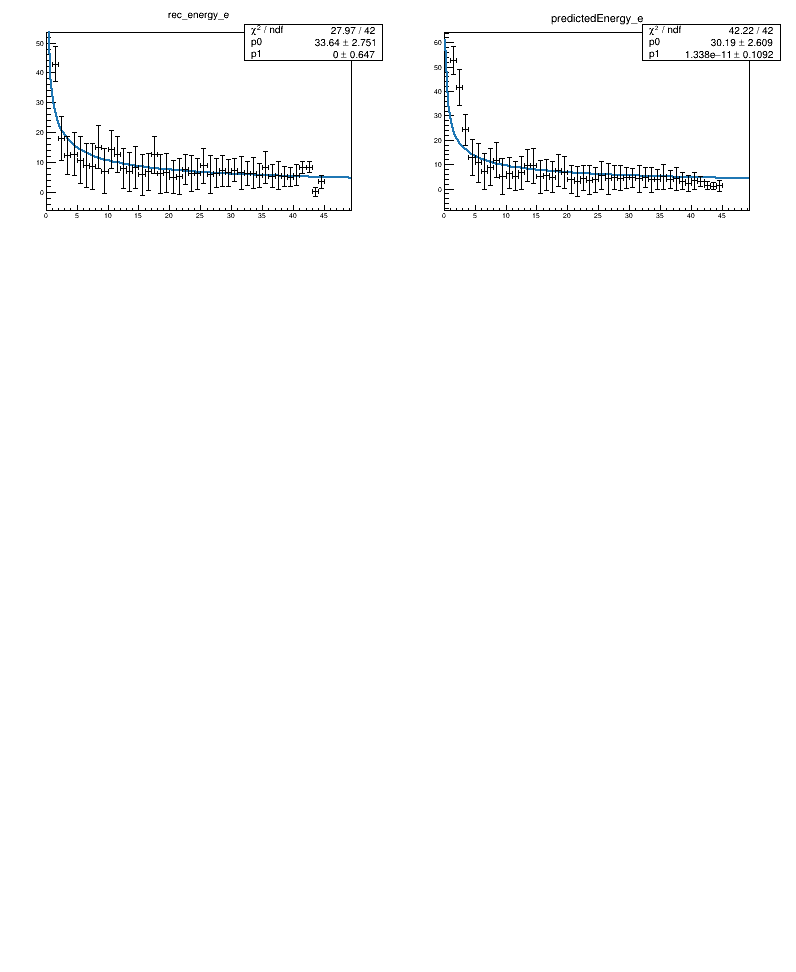

In [14]:
ROOT.gStyle.SetOptStat("emr")
ROOT.gStyle.SetOptFit(1)

c2 = ROOT.TCanvas("c2", "c2", 800, 1000)
c2.Divide(2,4)
c2.SetLeftMargin(.12)
c2.SetBottomMargin(.12)
c2.SetRightMargin(.12)
c2.SetTopMargin(.12)

f1 = ROOT.TF1("f1","[0]/sqrt(x)+[1]")
f1.SetParameter(0, 30.)
f1.SetParLimits(0, 0., 1e3)
f1.SetParameter(1, 1.)
f1.SetParLimits(1, 0., 1e3)
f1.SetLineColor(palette['blue'].GetNumber())
gr = [None, None, None, None, None, None, None, None]

for i,col in enumerate(['rec_energy', 'predictedEnergy']):
    for j,s in enumerate(['e']):#, 'mu', 'gamma', 'pi']):
        idx = 2*j+i
        c2.cd(idx+1)
        x = array('f', data[col][s]['Energy'])
        n = len(x)
        y = array('f', data[col][s]['EnergyRes'])
        ex = array('f', [0.5*binwidth*1e-3]*len(data[col][s]['Energy']))
        ey = array('f', data[col][s]['EnergyResErr'])
#         ey = array('f', [0.]*n)
        gr[idx] = ROOT.TGraphErrors(n, x, y, ex, ey)
        gr[idx].SetTitle(col + "_" + s)
#         if i == 1:
        gr[idx].Fit(f1, "SEM+")
#         gr.SetMarkerStyle(marker[i])
    
        gr[idx].Draw('ap')

c2.Update()

labelsize = 0.03
titlesize = 0.04
titleoffset = 1.2
labeloffset = 0.005
linewidth = 3
ticklength = 0.02

# mg.GetXaxis().SetTitle("E_{true} [GeV]")
# mg.GetYaxis().SetTitle("#sigma/E_{reconstructed} [%]")
# mg.SetMinimum(0.)
# # mg.SetMaximum(16.)
# mg.GetXaxis().SetTickLength(ticklength)
# mg.GetYaxis().SetTickLength(ticklength)
# mg.GetXaxis().SetTitleSize(titlesize)
# mg.GetYaxis().SetTitleSize(titlesize)
# mg.GetXaxis().SetLabelSize(labelsize)
# mg.GetYaxis().SetLabelSize(labelsize)
# mg.GetXaxis().CenterTitle()
# mg.GetYaxis().CenterTitle()
# mg.GetXaxis().SetTitleOffset(titleoffset)
# mg.GetYaxis().SetTitleOffset(titleoffset)
# mg.GetXaxis().SetLabelOffset(labeloffset)
# mg.GetYaxis().SetLabelOffset(labeloffset)

# stats1 = gr[0].GetListOfFunctions().FindObject("stats")
# # stats2 = gr[1].GetListOfFunctions().FindObject("stats")
# stats1.SetTextColor(palette['blue'].GetNumber())
# # stats2.SetTextColor(palette['red'].GetNumber())
# stats1.SetX2NDC(1-c2.GetRightMargin()); stats1.SetX1NDC(stats1.GetX2NDC()-0.4)
# stats1.SetY2NDC(1-c2.GetTopMargin()-0.016); stats1.SetY1NDC(stats1.GetY2NDC()-0.12)
# # stats2.SetX2NDC(stats1.GetX2NDC()); stats2.SetX1NDC(stats1.GetX1NDC())
# # stats2.SetY2NDC(stats1.GetY1NDC()); stats2.SetY1NDC(stats2.GetY2NDC()-0.12)
# stats1.SetTextSize(labelsize)
# # stats2.SetTextSize(labelsize)
# stats1.SetBorderSize(0)
# # stats2.SetBorderSize(0)

# # add legend
# # x1 = c2.GetLeftMargin() + 0.03
# # x2 = x1 + 0.25
# # y2 = 1 - c2.GetTopMargin() - 0.03 - 0.01
# # y1 = y2 - 0.08
# # legend = ROOT.TLegend(x1, y1, x2, y2)
# # legend.SetFillColor(0)
# # legend.SetBorderSize(0)
# # legend.SetTextSize(labelsize)
# # # legend.AddEntry(gr[0], "electron", "p")
# # # legend.AddEntry(gr[1], "pion", "p")
# # legend.Draw()

c2.Modified()
c2.Print("energyres.png")
c2.Draw()